In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm
import datetime
import statsmodels
from scipy.optimize import curve_fit
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('testLong.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(df)

          Month          Hash    Difficulty  Addresses
0    2009-01-10  3.032326e-06  1.000000e+00         61
1    2009-01-11  4.623055e-06  1.000000e+00         95
2    2009-01-12  4.672765e-06  1.000000e+00        101
3    2009-01-13  6.114363e-06  1.000000e+00        123
4    2009-01-14  6.412625e-06  1.000000e+00        133
...         ...           ...           ...        ...
5026 2022-10-15  2.690738e+08  3.561079e+13     838678
5027 2022-10-16  2.549120e+08  3.561079e+13     769067
5028 2022-10-17  2.655333e+08  3.561079e+13     870371
5029 2022-10-18  2.513715e+08  3.561079e+13     887194
5030 2022-10-19  2.673035e+08  3.561079e+13     923688

[5031 rows x 4 columns]


In [3]:
train = df[:int(len(df)*0.9)]
test = df[int(0.9*len(df)):]
train.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)
test.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)

/var/folders/6v/prbg9yl95vzfc3swbz1llv040000gn/T/ipykernel_49043/1291124300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)
/var/folders/6v/prbg9yl95vzfc3swbz1llv040000gn/T/ipykernel_49043/1291124300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)


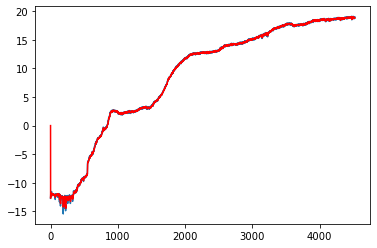

In [4]:
model = statsmodels.tsa.arima.model.ARIMA(np.log(train['Hash']), order=(2,1,2))
results = model.fit()
#plt.plot(df_log_shift)
plt.plot(np.log(train['Hash']))
plt.plot(results.fittedvalues, color='red')

In [5]:
# predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# predictions_ARIMA_log = pd.Series(np.log(train['Hash']).iloc[0], index=train.index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
# #predictions_ARIMA = np.exp(predictions_ARIMA_log)
# predictions_ARIMA = predictions_ARIMA_log
# plt.plot(df)
# plt.plot(predictions_ARIMA)

In [6]:
#results.plot_predict(1,264)

In [7]:
#train.index = pd.date_range(start='2010', end='2020')

In [10]:
res = ARIMA((train['Hash']), order=(1,2,2), seasonal_order=(0,0,0,0)).fit()

/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


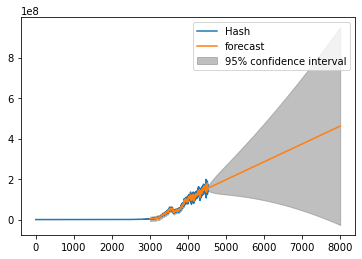

In [11]:
fig, ax = plt.subplots()
ax = train['Hash'].loc[0:].plot(ax=ax)
plot_predict(res, 3000, 8000, ax = ax)
plt.show()

In [175]:
dates = pd.date_range(start='21-OCT-2022', end='31-DEC-2030').to_frame()
dates['Month'] = dates.index
dates['Hash'] = 0
print(dates.columns)
dates.drop([0], axis = 1, inplace = True)
#print(dates)

Index([0, 'Month', 'Hash'], dtype='object')


In [176]:
new = pd.concat([test, dates])

TypeError: float() argument must be a string or a number, not 'Timestamp'

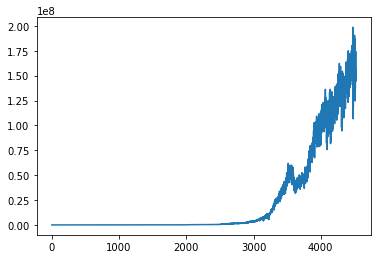

In [177]:
import statsmodels.api as sm
model=ARIMA(train['Hash'],order=(1, 1, 1))
results=model.fit()
new['forecast']=results.predict(start=1,end=100)
#train[['Hash','forecast']].plot(figsize=(12,8))
plt.plot(train['Hash'])
plt.plot(new['forecast'])

In [42]:
res = ARIMA((df['Hash']), order=(1,2,2), seasonal_order=(0,0,0,0)).fit()
res = ARIMA

/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


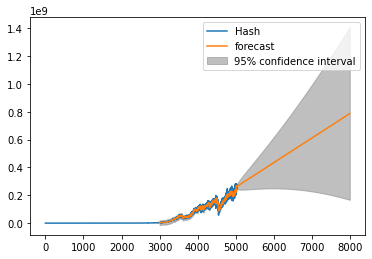

In [15]:
fig, ax = plt.subplots()
ax = df['Hash'].loc[0:].plot(ax=ax)
plot_predict(res, 3000, 8000, ax = ax)
plt.show()

In [16]:
model = ARIMA(np.log(df['Hash']), order=(1,1,1))
results = model.fit()

In [33]:
forecast_steps = 5031 # 10 years x 12 months
results.forecast()
#forecast, conf_int = results.predict(n_periods=forecast_steps, return_conf_int=True, alpha = 0.05)
forecast = results.forecast(steps=forecast_steps)
predicted_data = np.exp(forecast)
# lower_ci = np.exp(conf_int[:, 0])
# upper_ci = np.exp(conf_int[:, 1])

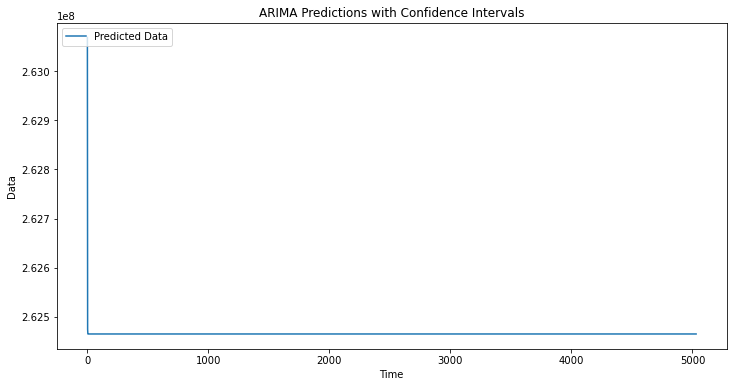

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, predicted_data, label='Predicted Data')
#plt.fill_between(df.index, lower_ci, upper_ci, alpha=0.2, label='Confidence Intervals')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('ARIMA Predictions with Confidence Intervals')
plt.show()

In [26]:
preds, conf_int = model.predict(n_periods=100, return_conf_int=True, alpha = 0.05)

TypeError: predict() missing 1 required positional argument: 'params'